# Big Data in Finance: Part II <BR><BR> Homework 2 Cong Xiao_cx2235

## 1. Download Data

### Answer: Both two files: "stock_monthly.py" and "stock_annual.py" are uploaded within the same zip file.  I can run them without problems.

## 2. Calculate past 11-1 returns

### Answer: This part is finished in "stock_monthly.py" by the function "calculalte_cumulative_return"

## 3. Portfolios Sorts

### Answer: This part is finished in "portfolio_sorts_CongXiao.py"

## Questions
----

__***Stock Monthly Questions***__

**Question 1 (20 pts)**

Report here number of missings, number of unique permnos and (average, min, max) ret_11_1 for December 2019.

In [3]:
%load_ext autoreload
%autoreload 2
#useful_packages
import pandas as pd
import numpy as np
import pickle

In [13]:
with open("C:\\1notes\\Spring 2020\\Big data\\Part2HW\\HW2stock_monthly.pkl","rb") as f:
    data=pickle.load(f,encoding='utf-8')
#data=pickle.load(open("C:\\1notes\\Spring 2020\\Big data\\Part2HW\\HW2stock_monthly.pkl",encoding='utf-8'))
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data2019Dec=data[(data.year==2019) & (data.month==12)]
print("number of missing:",data2019Dec['ret_11_1'].isnull().sum())

number of missing: 536


In [15]:
print("number of unique permnos",data2019Dec.permno.nunique())

number of unique permnos 7595


In [16]:
print("average,min,max of ret_11_1:",np.mean(data2019Dec.ret_11_1),np.min(data2019Dec.ret_11_1),np.max(data2019Dec.ret_11_1))

average,min,max of ret_11_1: 0.16460373844785944 -0.9994244707713349 12.960992730639935


**Question 2 (10 pts)**

List the top 10 firms that had the highest 11-months performance returns as December 2019.

In [23]:
a=data2019Dec.sort_values('ret_11_1',ascending=False)[['ticker','ret_11_1']].head(10)
a.reset_index(inplace=True,drop=True)
a

,ticker,ret_11_1
0,AXSM,12.960993
1,CNST,10.610972
2,EVER,7.423445
3,SSI,5.486487
4,ARWR,4.878422
5,PRVB,4.627119
6,HEBT,4.464417
7,ROKU,4.234008
8,WKHS,4.208334
9,CFMS,4.195531


**Question 3 (10 pts)**

List the top 10 firms that had the lowest 11-months performance returns as December 2019.

In [24]:
a=data2019Dec.sort_values('ret_11_1',ascending=True)[['ticker','ret_11_1']].head(10)
a.reset_index(inplace=True,drop=True)
a

,ticker,ret_11_1
0,CEI,-0.999424
1,VIVE,-0.991961
2,DPW,-0.988659
3,INPX,-0.986897
4,MTFB,-0.985842
5,WTRH,-0.965919
6,JAGX,-0.961913
7,NAKD,-0.960798
8,OPGN,-0.953462
9,TOPS,-0.953426


__***Stock Annual Questions***__

**Question 4 (30 pts)**

There is a large literature about the value premium. The value premium is the observation that value stocks (stocks with high BEME values) on average outperform growth stocks (stocks with low BEME values). Cohen, Polk and Vuolteenaho (2003) show that the expected return on value-minus-growth strategies is typically high at times when their spread in BEME ratios is wide. The spread in BEME ratios of value and growth stocks is known as the "value spread".
* Calculate a time series of the value spread between the value stocks (top BEME bucket) and the growth stocks (bottom BEME bucket). The BEME value of each bucket should be calculated as the log of ratio of the sum of BE of all stocks in the bucket and the sum of ME of all stocks in the bucket.
* Report a time series plot of the value spread.
* Based on your plot, what is your best guess for the performance of value-minus-growth strategies in the last 10 years?

In [29]:
import pandas as pd
beme=pd.read_csv("C:\\1notes\\Spring 2020\\Big data\\Part2HW\\beme_sorts")
opbe=pd.read_csv("C:\\1notes\\Spring 2020\\Big data\\Part2HW\\opbe_sorts")
inv=pd.read_csv("C:\\1notes\\Spring 2020\\Big data\\Part2HW\\inv_sorts")
with open("C:\\1notes\\Spring 2020\\Big data\\Part2HW\\HW2stock_annual.pkl","rb") as f:
    annualdata=pickle.load(f,encoding='utf-8')

In [41]:
#as what we do in portfolio_sorts according to instructor's code
annualdata.rename(columns={'mesum_june': 'me', 'inv_gvkey': 'inv'}, inplace=True)
annualdata.head()

,gvkey,datadate,conm,fyear,fyr,at,capx,ceq,cogs,dlc,...,mejune,exchcd,shrcd,ticker,siccd,me,medec,mesum_dec,beme,sich_filled
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11734.59375,3.0,10.0,OMFGA,3990.0,NaN,NaN,NaN,NaN,3990.0
1,013007,1986-10-31,OPTIMUM MANUFACTURING -CL A,1986.0,10.0,2.115,0.240,0.418,0.511,0.968,...,NaN,3.0,10.0,OMFGA,3990.0,NaN,1981.546875,1981.546875,0.000211,3990.0
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6033.12500,3.0,11.0,GFGC,4920.0,NaN,NaN,NaN,NaN,4920.0
3,012994,1986-06-30,GAS NATURAL INC,1986.0,6.0,12.242,0.551,5.432,19.565,0.343,...,5822.12500,3.0,11.0,GFGC,4920.0,5822.125,6937.000000,6937.000000,0.001014,4920.0
4,012994,1987-06-30,GAS NATURAL INC,1987.0,6.0,11.771,0.513,5.369,15.538,0.377,...,6200.00000,3.0,11.0,GFGC,4920.0,6200.000,5828.000000,5828.000000,0.001208,4924.0


In [42]:
beme.head()

,rankyear,permno,bemeportfolio,meportfolio
0,1926.0,10006.0,beme2,me2
1,1926.0,10022.0,beme2,me1
2,1926.0,10030.0,beme1,me2
3,1926.0,10057.0,beme2,me1
4,1926.0,10073.0,beme3,me1


In [43]:
opbe.head()

,rankyear,permno,opbeportfolio,meportfolio
0,1951.0,10006.0,opbe3,me1
1,1951.0,10102.0,opbe3,me2
2,1951.0,10153.0,opbe2,me2
3,1951.0,10161.0,opbe1,me2
4,1951.0,10188.0,opbe3,me1


In [44]:
inv.head()

,rankyear,permno,invportfolio,meportfolio
0,1952.0,10006.0,inv1,me1
1,1952.0,10102.0,inv3,me2
2,1952.0,10153.0,inv3,me2
3,1952.0,10161.0,inv2,me2
4,1952.0,10188.0,inv3,me1


In [64]:
#contruct useful dataframe to calculate the spread
q4=annualdata.merge(beme,left_on=['permno','rankyear'],right_on=['permno','rankyear'])
new_q4=pd.DataFrame(q4.groupby(['rankyear', 'bemeportfolio'])['be'].sum())
new_q4['me']=(q4.groupby(['rankyear', 'bemeportfolio'])['mesum_dec'].sum())
new_q4['beme']=np.log(new_q4.be/new_q4.me)
#we need the previous index "rankyear" to be transformed into a column
new_q4.reset_index(inplace=True)

In [65]:
#Calculate a time series of the value spread
year=new_q4.rankyear.unique()
spread=[]
for i in year:
    top=new_q4.iloc[new_q4.loc[(new_q4.rankyear==i)& (new_q4.bemeportfolio=="beme3")].index[0]]['beme']
    bottom=new_q4.iloc[new_q4.loc[(new_q4.rankyear==i)& (new_q4.bemeportfolio=="beme1")].index[0]]['beme']
    spread.append(top-bottom)

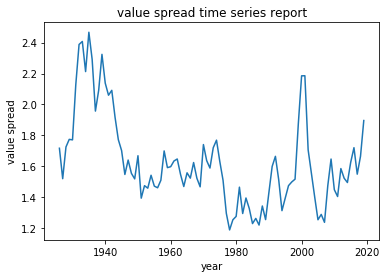

In [66]:
#Report a time series plot of the value spread.
import matplotlib.pyplot as plt
plt.figure()
plt.plot(year,spread)
plt.xlabel("year")
plt.ylabel("value spread")
plt.title("value spread time series report")
plt.show()

### Answer: Generally, my guess for the strategies is that they are performing well in the past 10 years. We can see from the figure. From 2010 to 2020, the value spread was growing with a positive drift although bearing with some fluctuations (from about 1.4 to 1.9). According to Cohen, Polk and Vuolteenaho (2003), when the value spread is higher, the expected return on value-minus-growth strategies is typically higher. So They should be doing well.

**Question 5 (30 pts)**

Analogous to the value spread, calculate the profitability spread and the investment spread. Report a plot with the 3 time series plots. 

In [70]:
#opbe:
#contruct useful dataframe to calculate the spread
q4=annualdata.merge(beme,left_on=['permno','rankyear'],right_on=['permno','rankyear'])
q4=q4.merge(opbe,left_on=['permno','rankyear','meportfolio'],right_on=['permno','rankyear','meportfolio'])
q4=q4.merge(inv,left_on=['permno','rankyear','meportfolio'],right_on=['permno','rankyear','meportfolio'])
new_q4=pd.DataFrame(q4.groupby(['rankyear', 'opbeportfolio'])['op'].sum())
new_q4['be']=(q4.groupby(['rankyear', 'opbeportfolio'])['be'].sum())
new_q4['opbe']=np.log(new_q4.op/new_q4.be)
#we need the previous index "rankyear" to be transformed into a column
new_q4.reset_index(inplace=True)
#Calculate a time series of the value spread
year=new_q4.rankyear.unique()
opbe_spread=[]
for i in year:
    top=new_q4.iloc[new_q4.loc[(new_q4.rankyear==i)& (new_q4.opbeportfolio=="opbe3")].index[0]]['opbe']
    bottom=new_q4.iloc[new_q4.loc[(new_q4.rankyear==i)& (new_q4.opbeportfolio=="opbe1")].index[0]]['opbe']
    opbe_spread.append(top-bottom)

In [79]:
#inv
q4inv=annualdata.merge(beme,left_on=['permno','rankyear'],right_on=['permno','rankyear'])
q4inv=q4inv.merge(opbe,left_on=['permno','rankyear','meportfolio'],right_on=['permno','rankyear','meportfolio'])
q4inv=q4inv.merge(inv,left_on=['permno','rankyear','meportfolio'],right_on=['permno','rankyear','meportfolio'])
q4inv['lag_at'] = q4inv.groupby('permno').at.shift(1)
q4inv2=pd.DataFrame(q4inv.groupby(['rankyear', 'invportfolio'])['at'].sum())
q4inv2['lagat']=(q4inv.groupby(['rankyear', 'invportfolio'])['lag_at'].sum())
q4inv2['at'].astype('float64')
q4inv2['inv']=(q4inv2['at']-q4inv2.lagat)/q4inv2.lagat
q4inv2.reset_index(inplace=True)

inv_spread=[]
for i in year:
    top=q4inv2.iloc[q4inv2.loc[(q4inv2.rankyear==i)& (q4inv2.invportfolio=="inv3")].index[0]]['inv']
    bottom=q4inv2.iloc[q4inv2.loc[(q4inv2.rankyear==i)& (q4inv2.invportfolio=="inv1")].index[0]]['inv']
    inv_spread.append(top-bottom)

C:\APP\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


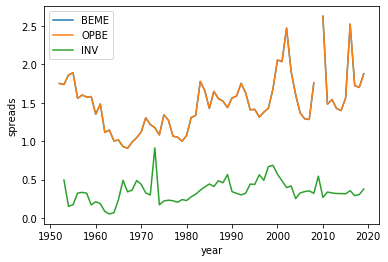

In [80]:
plt.figure()
plt.plot(year,spread)
plt.plot(year,opbe_spread)
plt.plot(year,inv_spread)
plt.xlabel('year')
plt.ylabel('spreads')
L=['BEME','OPBE','INV']
plt.legend(L)
plt.show()

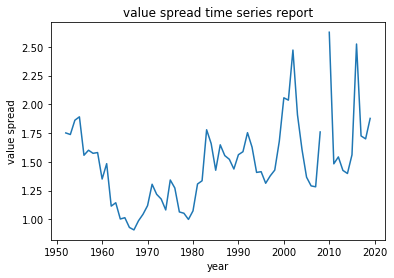

In [81]:
plt.figure()
plt.plot(year,spread)
plt.xlabel("year")
plt.ylabel("value spread")
plt.title("value spread time series report")
plt.show()